In [34]:
import qiskit

In [35]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.2', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.3', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [36]:
from qiskit import IBMQ

In [37]:
IBMQ.save_account('46fd3c15ef48cd5f5d6e4a8ae48748af512d2a57b1647282d61d7e98fda97a54d4be4ab8ff433fccd6613f9e30b3819a1aef9d6262f4980804cb2cd3952f7850')

configrc.store_credentials:WARNING:2024-01-01 19:39:31,156: Credentials already present. Set overwrite=True to overwrite.


In [38]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-01-01 19:39:34,353: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [39]:
from qiskit import *

In [40]:
qr = QuantumRegister(2)

In [41]:
cr = ClassicalRegister(2)

In [42]:
circuit = QuantumCircuit(qr,cr)

In [43]:
%matplotlib inline

In [44]:
circuit.draw()

q14_0: 
       
q14_1: 
       
 c1: 2/

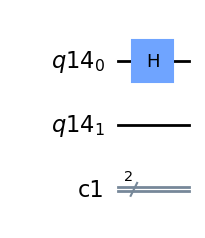

In [45]:
circuit.h(qr[0]) #hadamard gate
circuit.draw(output = 'mpl')

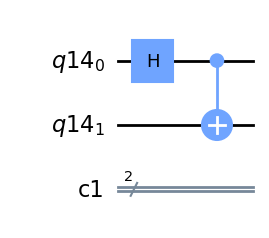

In [46]:
circuit.cx(qr[0],qr[1]) #controlled X gate
circuit.draw(output = 'mpl')

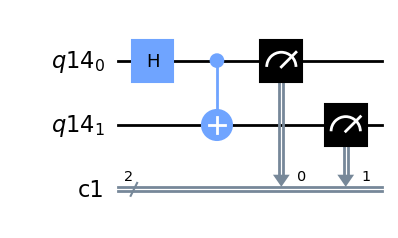

In [47]:
circuit.measure(qr,cr)
circuit.draw(output = 'mpl')

In [48]:
#setting up simulator

simulator = Aer.get_backend('qasm_simulator')

In [49]:
result = execute(circuit, backend = simulator).result()

In [50]:
from qiskit.tools.visualization import plot_histogram

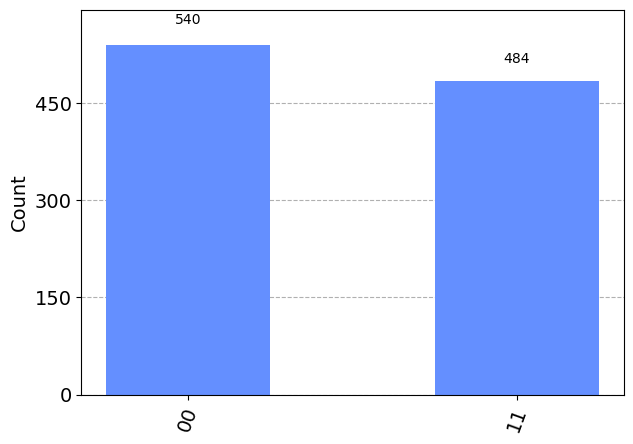

In [51]:
    plot_histogram(result.get_counts(circuit))

In [52]:
provider = IBMQ.get_provider('ibm-q')

In [53]:
# Get a list of available backends
backends = provider.backends()

# Print the names of available backends
    print("Available Backends:", [backend.name() for backend in backends])

Available Backends: ['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


In [54]:
qcomp = provider.get_backend('ibm_osaka')

In [55]:
job = execute(circuit, backend = qcomp)

In [56]:
from qiskit.tools.monitor import job_monitor

In [57]:
job_monitor(job)

Job Status: job has successfully run


In [58]:
results = job.result()

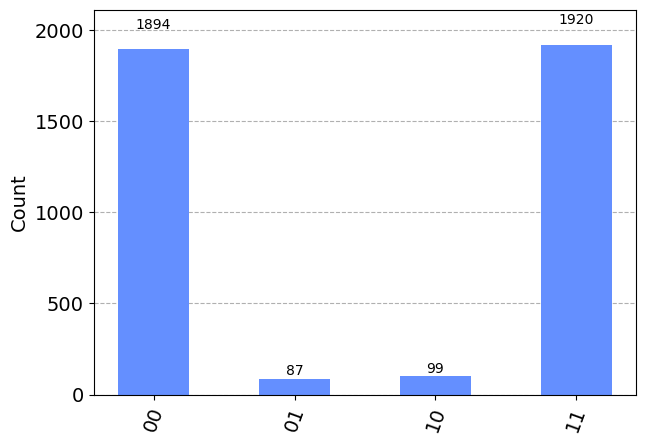

In [59]:
plot_histogram(results.get_counts(circuit))